In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS, "uciml/breast-cancer-wisconsin-data", file_path
)

df.head()

/home/yomma/itmo/fall-2025/students/mavlyukeev-av/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_53371/2275708220.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0}).astype(float)
df.dtypes

id                           int64
diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [3]:
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

feature_names = df.drop(columns=["diagnosis"]).columns
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
import numpy as np

X = df[feature_names]
y = np.where(df["diagnosis"].values == 1, 1, 0)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Сравнение ядер

In [7]:
from knn import SimpleKNNClassifier


class Tracker:
    def __init__(self):
        self.k_results = []

    def callback(self, results):
        self.k_results = results

## Прямоугольное ядро

In [8]:
tracker = Tracker()

model = SimpleKNNClassifier(k=None, ker="rectangular")
model.fit(X_train_scaled, y_train, k_selection_callback=tracker.callback)

SimpleKNNClassifier(k=3, ord=None, ker='rectangular', X_train=array([[0.42780065, 0.45755834, 0.40709004, ..., 0.34278351, 0.27261975,
        0.19336219],
       [0.25268588, 0.0906324 , 0.24227766, ..., 0.32271478, 0.24876799,
        0.08310376],
       [0.27776989, 0.39431857, 0.26839887, ..., 0.19247423, 0.18194362,
        0.17361931],
       ...,
       [0.28486914, 0.52147447, 0.26826066, ..., 0.20347079, 0.14606742,
        0.0516201 ],
       [0.34166312, 0.3659114 , 0.33598231, ..., 0.46013746, 0.19101124,
        0.15440115],
       [0.4770221 , 0.38180588, 0.46997443, ..., 0.62783505, 0.2085551 ,
        0.13741309]], shape=(455, 30)), y_train=array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 

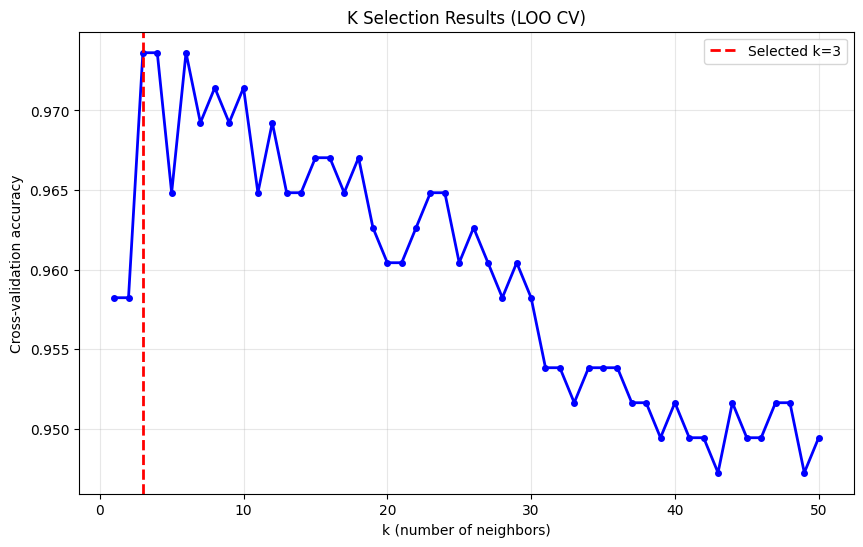

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k_values = range(1, len(tracker.k_results) + 1)
plt.plot(k_values, tracker.k_results, "b-", linewidth=2, marker="o", markersize=4)
plt.axvline(
    x=model.k, color="red", linestyle="--", linewidth=2, label=f"Selected k={model.k}"
)
plt.xlabel("k (number of neighbors)")
plt.ylabel("Cross-validation accuracy")
plt.title("K Selection Results (LOO CV)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("../misc/loo_rect.png")
plt.show()

## Гауссовское ядро

In [10]:
tracker = Tracker()

model = SimpleKNNClassifier(k=None, ker="gaussian")
model.fit(X_train_scaled, y_train, k_selection_callback=tracker.callback)

SimpleKNNClassifier(k=4, ord=None, ker='gaussian', X_train=array([[0.42780065, 0.45755834, 0.40709004, ..., 0.34278351, 0.27261975,
        0.19336219],
       [0.25268588, 0.0906324 , 0.24227766, ..., 0.32271478, 0.24876799,
        0.08310376],
       [0.27776989, 0.39431857, 0.26839887, ..., 0.19247423, 0.18194362,
        0.17361931],
       ...,
       [0.28486914, 0.52147447, 0.26826066, ..., 0.20347079, 0.14606742,
        0.0516201 ],
       [0.34166312, 0.3659114 , 0.33598231, ..., 0.46013746, 0.19101124,
        0.15440115],
       [0.4770221 , 0.38180588, 0.46997443, ..., 0.62783505, 0.2085551 ,
        0.13741309]], shape=(455, 30)), y_train=array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 

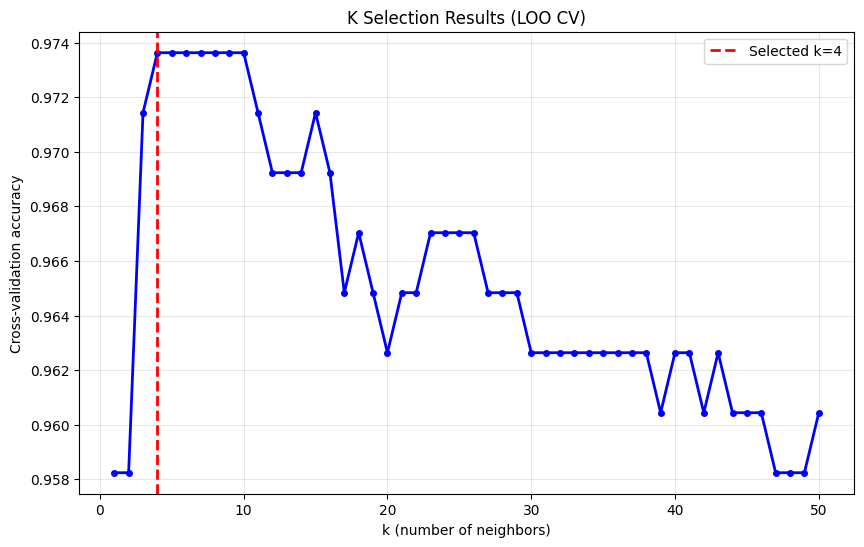

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k_values = range(1, len(tracker.k_results) + 1)
plt.plot(k_values, tracker.k_results, "b-", linewidth=2, marker="o", markersize=4)
plt.axvline(
    x=model.k, color="red", linestyle="--", linewidth=2, label=f"Selected k={model.k}"
)
plt.xlabel("k (number of neighbors)")
plt.ylabel("Cross-validation accuracy")
plt.title("K Selection Results (LOO CV)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("../misc/loo_gauss.png")
plt.show()

## Треугольное ядро

In [12]:
tracker = Tracker()

model = SimpleKNNClassifier(k=None, ker="triangular")
model.fit(X_train_scaled, y_train, k_selection_callback=tracker.callback)

SimpleKNNClassifier(k=7, ord=None, ker='triangular', X_train=array([[0.42780065, 0.45755834, 0.40709004, ..., 0.34278351, 0.27261975,
        0.19336219],
       [0.25268588, 0.0906324 , 0.24227766, ..., 0.32271478, 0.24876799,
        0.08310376],
       [0.27776989, 0.39431857, 0.26839887, ..., 0.19247423, 0.18194362,
        0.17361931],
       ...,
       [0.28486914, 0.52147447, 0.26826066, ..., 0.20347079, 0.14606742,
        0.0516201 ],
       [0.34166312, 0.3659114 , 0.33598231, ..., 0.46013746, 0.19101124,
        0.15440115],
       [0.4770221 , 0.38180588, 0.46997443, ..., 0.62783505, 0.2085551 ,
        0.13741309]], shape=(455, 30)), y_train=array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0

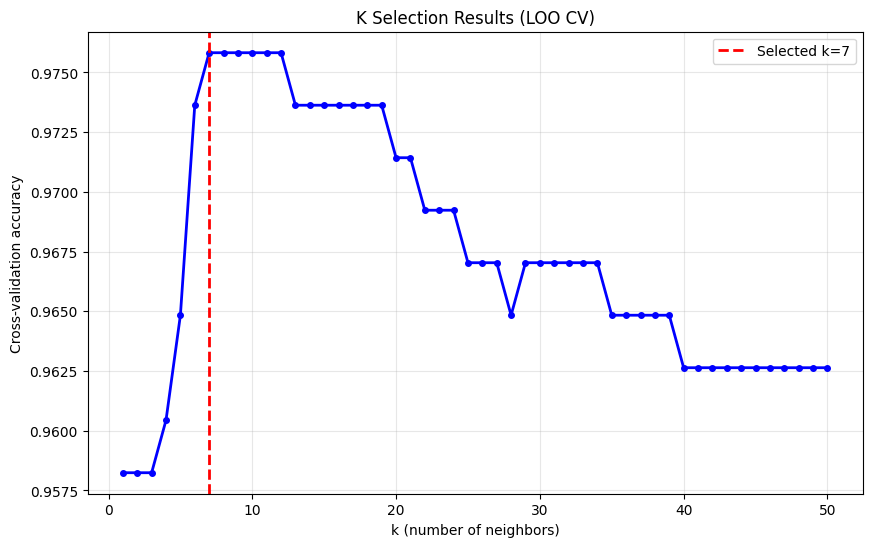

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k_values = range(1, len(tracker.k_results) + 1)
plt.plot(k_values, tracker.k_results, "b-", linewidth=2, marker="o", markersize=4)
plt.axvline(
    x=model.k, color="red", linestyle="--", linewidth=2, label=f"Selected k={model.k}"
)
plt.xlabel("k (number of neighbors)")
plt.ylabel("Cross-validation accuracy")
plt.title("K Selection Results (LOO CV)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("../misc/loo_tri.png")
plt.show()

# Сравнение с эталоном

## Реализованная модель

In [14]:
model = SimpleKNNClassifier(k=7, ker="triangular")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Confusion matrix:
 [[71  1]
 [ 4 38]]
Accuracy: 0.956140350877193
Recall: 0.9047619047619048
Precision: 0.9743589743589743
F1: 0.9382716049382716


## Эталон (sklearn)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [17]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Confusion matrix:
 [[71  1]
 [ 3 39]]
Accuracy: 0.9649122807017544
Recall: 0.9285714285714286
Precision: 0.975
F1: 0.9512195121951219


  0%|          | 0/454 [00:00<?, ?it/s]

100%|██████████| 454/454 [00:34<00:00, 13.18it/s]
/tmp/ipykernel_53371/1972299086.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


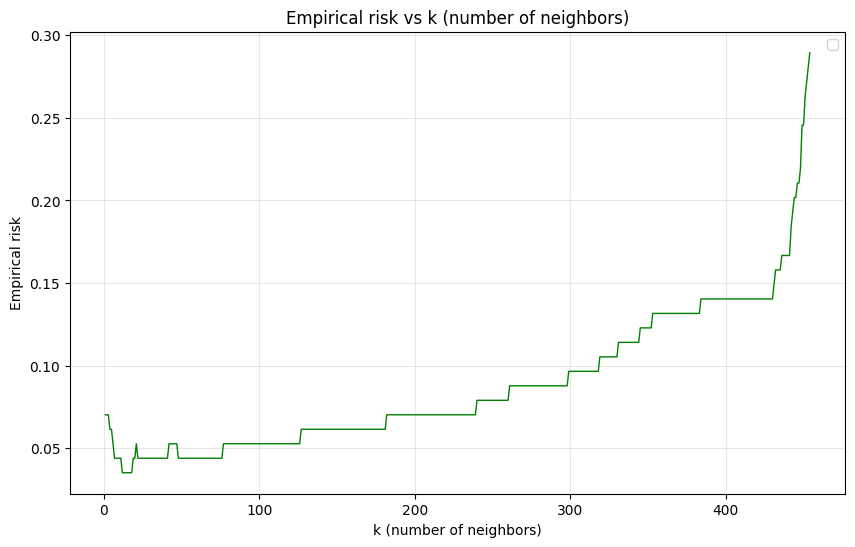

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

k_values = []
test_accuracies = []

for k in tqdm(range(1, len(X_train_scaled))):
    model_k = SimpleKNNClassifier(k=k, ker="triangular")
    model_k.fit(X_train_scaled, y_train)
    y_pred_k = model_k.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_k)
    k_values.append(k)
    test_accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(
    k_values,
    list(map(lambda x: 1 - x, test_accuracies)),
    "g-",
    linewidth=1,
    marker="",
    markersize=4,
)
plt.xlabel("k (number of neighbors)")
plt.ylabel("Empirical risk")
plt.title("Empirical risk vs k (number of neighbors)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig("../misc/empirical_risk.png")
plt.show()

# Отбор эталонов

100%|██████████| 435/435 [04:24<00:00,  1.65it/s]


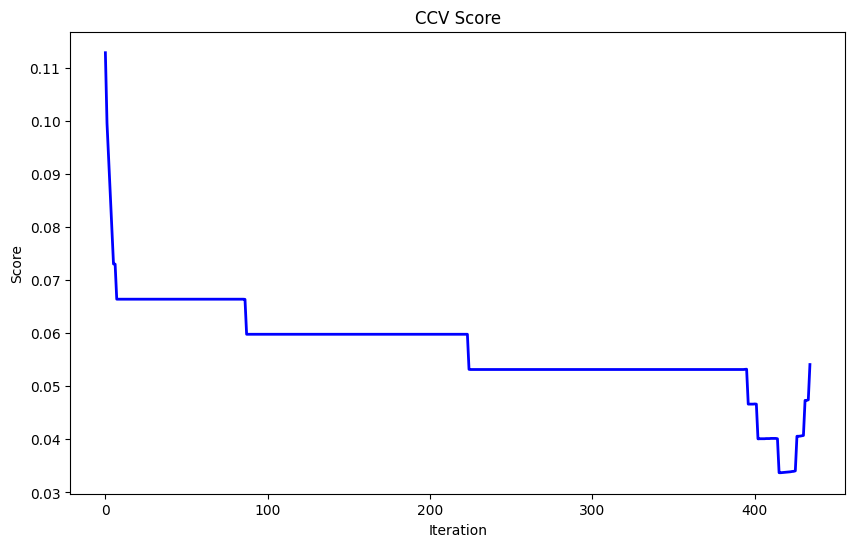

In [19]:
model_ccv = SimpleKNNClassifier(k=7, ker="triangular")
model_ccv.fit(X_train_scaled, y_train)

ccv_scores = []


def ccv_callback(score):
    global ccv_scores
    ccv_scores.append(score)


model_ccv.adjust_ref_by_ccv(ccv_callback)

plt.figure(figsize=(10, 6))
plt.plot(ccv_scores, "b-", linewidth=2, marker="", markersize=4)
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.title("CCV Score")
plt.savefig("../misc/ccv.png")
plt.show()

In [20]:
model_ccv.shrink_x_by_ref_elements(removed_samples=430)
y_pred = model_ccv.predict(X_test_scaled)

print("Automatic k selection results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Selected k: {model_ccv.k}")
print(f"Train size: {len(model_ccv.shrinked_y_train)}")


Automatic k selection results:
Confusion Matrix:
[[72  0]
 [ 2 40]]

Accuracy: 0.982
Precision: 0.983
Recall: 0.982
F1-score: 0.982
Selected k: 7
Train size: 24
